In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Loading :-

In [38]:
df = pd.read_csv("SEER Breast Cancer Dataset .csv")
df.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


## Data Cleaning :-

In [39]:
df.isnull().sum()

Age                          0
Race                         0
Marital Status               0
Unnamed: 3                4024
T Stage                      0
N Stage                      0
6th Stage                    0
Grade                        0
A Stage                      0
Tumor Size                   0
Estrogen Status              0
Progesterone Status          0
Regional Node Examined       0
Reginol Node Positive        0
Survival Months              0
Status                       0
dtype: int64

In [40]:
df.shape

(4024, 16)

In [41]:
# Drop the unnames columns
df = df.drop("Unnamed: 3",axis=1)
df.columns

Index(['Age', 'Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [42]:
df.columns = df.columns.str.strip(" ")

In [43]:
# Display the cleaned column names
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A Stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Reginol Node Positive   4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

In [45]:
df['Race'].unique()

array(['Other (American Indian/AK Native, Asian/Pacific Islander)',
       'White', 'Black'], dtype=object)

In [46]:
df['Race'] = df['Race'].replace({'Other (American Indian/AK Native, Asian/Pacific Islander)':'Others'})

In [47]:
df['Marital Status'].unique()

array(['Married (including common law)', 'Divorced',
       'Single (never married)', 'Widowed', 'Separated'], dtype=object)

In [48]:
df['Marital Status'] = df['Marital Status'].replace({'Married (including common law)':'Married','Single (never married)':'Single'})

In [49]:
df['Grade'] = df['Grade'].replace({'Well differentiated; Grade I':'Grade I',
                                  'Moderately differentiated; Grade II':'Grade II',
                                  'Poorly differentiated; Grade III':'Grade III',
                                  'Undifferentiated; anaplastic; Grade IV':'Grade IV'})

In [50]:
grade_order = ['Grade I','Grade II','Grade III','Grade IV']

In [51]:
df['Grade'] = pd.Categorical(df['Grade'],categories=grade_order,ordered=True)

In [52]:
df['A Stage'].astype('category')
df['Estrogen Status'].astype("category")
df['Progesterone Status'].astype("category")
df['Status'].astype('category')

0       Alive
1       Alive
2        Dead
3        Dead
4        Dead
        ...  
4019    Alive
4020    Alive
4021    Alive
4022    Alive
4023    Alive
Name: Status, Length: 4024, dtype: category
Categories (2, object): ['Alive', 'Dead']

## Exploratory Data Analysis (EDA) :-

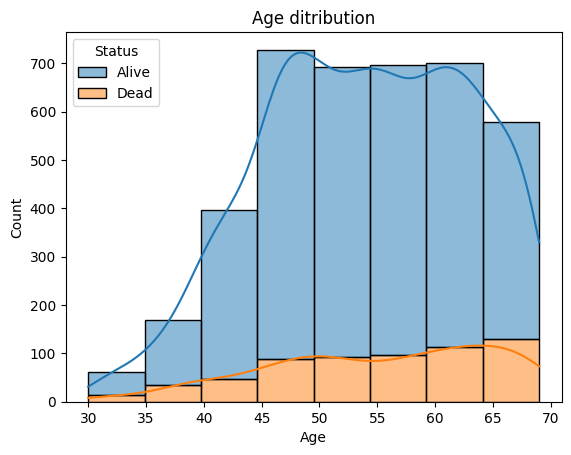

In [53]:

sns.histplot(data=df,x='Age',kde=True,binwidth=5,hue='Status',stat='count',multiple='stack')
plt.title("Age ditribution")
plt.show()

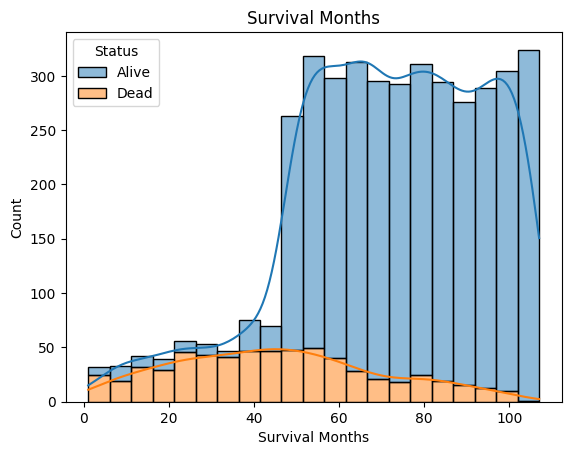

In [54]:
sns.histplot(data=df,x='Survival Months',kde=True,binwidth=5,hue='Status',stat='count',multiple='stack')
plt.title("Survival Months")
plt.show()

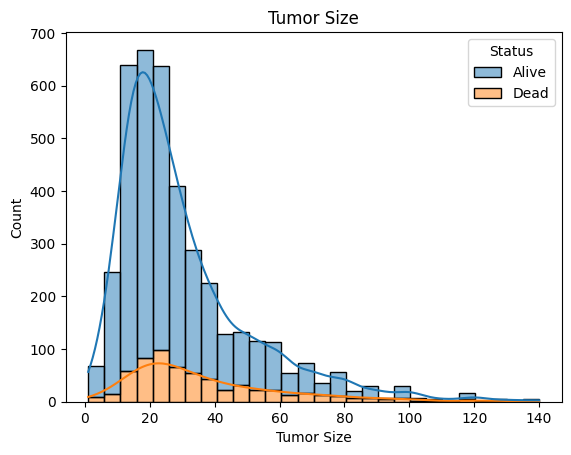

In [55]:
sns.histplot(data=df,x='Tumor Size',kde=True,binwidth=5,hue='Status',stat='count',multiple='stack')
plt.title("Tumor Size")
plt.show()

In [56]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [57]:
data = df
data['Status'] = df['Status'].replace({'Alive':1,'Dead':0})

In [58]:
sample  = pd.get_dummies(data)
sample.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Black,Race_Others,Race_White,Marital Status_Divorced,...,Grade_Grade I,Grade_Grade II,Grade_Grade III,Grade_Grade IV,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
0,43,40,19,11,1,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,True
1,47,45,25,9,2,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,True
2,67,25,4,1,2,0,False,False,True,False,...,False,False,True,False,False,True,False,True,False,True
3,46,19,26,1,2,0,False,False,True,True,...,False,True,False,False,False,True,False,True,False,True
4,63,35,21,5,3,0,False,False,True,False,...,False,True,False,False,False,True,False,True,False,True


In [59]:
features = sample.columns.drop("Status")
features

Index(['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive',
       'Survival Months', 'Race_Black', 'Race_Others', 'Race_White',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Separated', 'Marital Status_Single',
       'Marital Status_Widowed', 'T Stage_T1', 'T Stage_T2', 'T Stage_T3',
       'T Stage_T4', 'N Stage_N1', 'N Stage_N2', 'N Stage_N3', '6th Stage_IIA',
       '6th Stage_IIB', '6th Stage_IIIA', '6th Stage_IIIB', '6th Stage_IIIC',
       'Grade_Grade I', 'Grade_Grade II', 'Grade_Grade III', 'Grade_Grade IV',
       'A Stage_Distant', 'A Stage_Regional', 'Estrogen Status_Negative',
       'Estrogen Status_Positive', 'Progesterone Status_Negative',
       'Progesterone Status_Positive'],
      dtype='object')

In [60]:
X = sample.drop('Status',axis=1).values   # Features
y = sample['Status'].values    # Target variable

In [61]:
# from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.ensemble import VotingClassifier
import numpy as np

# Set the seed
SEED = 1

# Select only the relevant 5 features
selected_features = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']
X = sample[selected_features]
y = sample['Status']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate models
lr = LogisticRegression(random_state=SEED)
knn = kNN()
dt = DecisionTreeClassifier(random_state=SEED)

# Store them in a list
classifiers = [('LogisticRegression', lr), ('KNeighborsClassifier', knn), ('DecisionTreeClassifier', dt)]

# Train and evaluate each
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n👉 Accuracy of {clf_name} :{accuracy_score(y_test, y_pred):.3f}")
    print(f"👉 ROC AUC: of {clf_name} : {roc_auc_score(y_test, y_pred):.3f}")
    print(f"📃 Classification Report of {clf_name}:\n")
    print(classification_report(y_test, y_pred))



👉 Accuracy of LogisticRegression :0.877
👉 ROC AUC: of LogisticRegression : 0.677
📃 Classification Report of LogisticRegression:

              precision    recall  f1-score   support

           0       0.72      0.38      0.50       193
           1       0.89      0.97      0.93      1015

    accuracy                           0.88      1208
   macro avg       0.81      0.68      0.72      1208
weighted avg       0.86      0.88      0.86      1208


👉 Accuracy of KNeighborsClassifier :0.884
👉 ROC AUC: of KNeighborsClassifier : 0.702
📃 Classification Report of KNeighborsClassifier:

              precision    recall  f1-score   support

           0       0.73      0.44      0.55       193
           1       0.90      0.97      0.93      1015

    accuracy                           0.88      1208
   macro avg       0.82      0.70      0.74      1208
weighted avg       0.87      0.88      0.87      1208


👉 Accuracy of DecisionTreeClassifier :0.822
👉 ROC AUC: of DecisionTreeClassifie

### KNeighborsClassifier model provides highest accuracy of 88.3%

In [62]:
# -----   PREDICTION -----
predictor = knn  # Select the classifier you want to use for prediction 

# User input
input_data = []
for feature in selected_features:
    value = float(input(f"Enter value for {feature}: "))
    input_data.append(value)

# Predict
input_array = np.array(input_data).reshape(1, -1)
prediction = predictor.predict(input_array)
print("👉 Predicted Survival Status:", "Survived" if prediction[0] == 1 else "Not Survived")


👉 Predicted Survival Status: Survived
